In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import neattext.functions as nfx  #text cleaning

In [3]:
df=pd.read_csv('emotion_dataset_raw.csv')
df_1=pd.read_csv('emotion_dataset_2.csv')

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df.shape

(34792, 2)

In [6]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [7]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [8]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

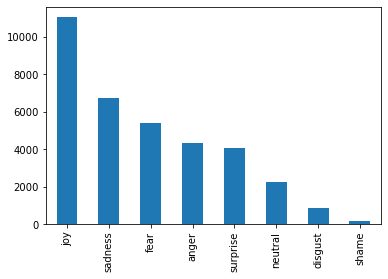

In [9]:
df['Emotion'].value_counts().plot(kind='bar')

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

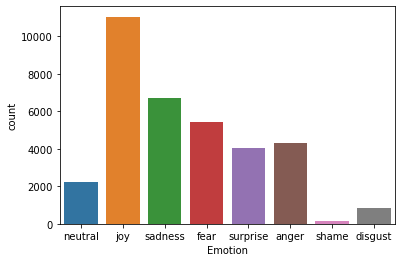

In [10]:
sns.countplot(df['Emotion'])

###Exploration
+Sentiment Analysis
+Keyword Extraction
   -keyword for each emotion
    -WordCloud

In [11]:
# Sentiment Analysis
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob= TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment >0:
        result='postive'
    elif sentiment <0:
         result='negative'
    else:
         result='neutral'
    return result

In [13]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [14]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,negative
3,joy,Such an eye ! The true hazel eye-and so brill...,postive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral


In [15]:
#compare emotion and sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     negative     1787
          neutral      1386
          postive      1124
disgust   negative      325
          neutral       249
          postive       282
fear      negative     1534
          neutral      1843
          postive      2033
joy       negative     1682
          neutral      3648
          postive      5715
neutral   negative      178
          neutral      1523
          postive       553
sadness   negative     2630
          neutral      2127
          postive      1965
shame     negative       46
          neutral        50
          postive        50
surprise  negative      623
          neutral      1545
          postive      1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

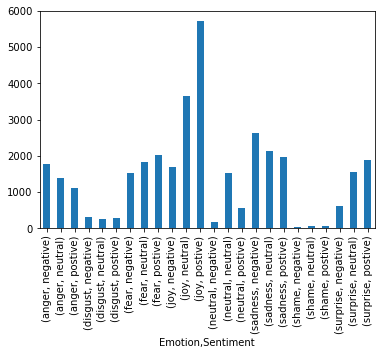

In [16]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


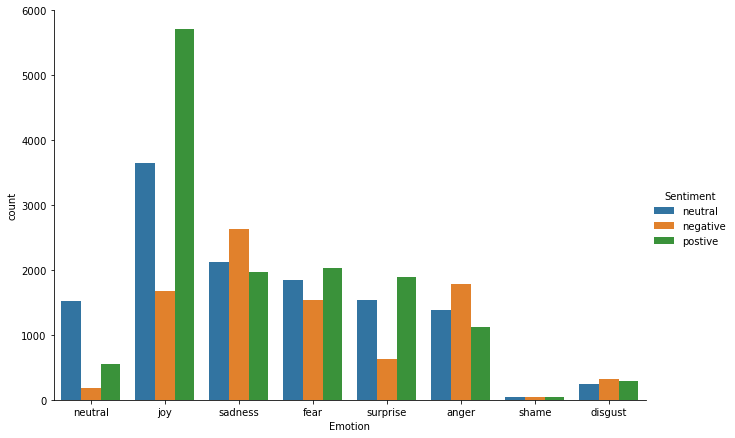

In [17]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)


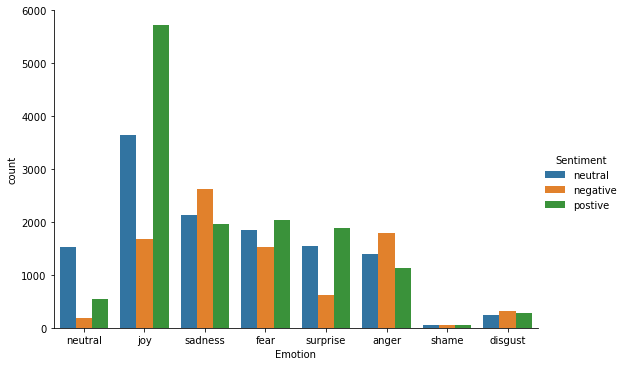

In [18]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

#Text Cleaning

In [19]:
df['Cleaned Text']=df['Text'].apply(nfx.remove_stopwords)

In [20]:
df['Cleaned Text']=df['Cleaned Text'].apply(nfx.remove_userhandles)

In [21]:
df['Cleaned Text']=df['Cleaned Text'].apply(nfx.remove_punctuations)

In [22]:
df[['Text','Cleaned Text']]

,Text,Cleaned Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


##Keyword Extraction

In [23]:
from collections import Counter

In [24]:
def extracted_keywords(text,num=50):
    tokens=[ token for token in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [25]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [26]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [27]:
df[df['Emotion']=='joy']

,Emotion,Text,Sentiment,Cleaned Text
1,joy,Sage Act upgrade on my to do list for tommorow.,neutral,Sage Act upgrade list tommorow
3,joy,Such an eye ! The true hazel eye-and so brill...,postive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,neutral,ugh babe hugggzzz u babe naamazed nga ako e...
12,joy,"For once in his life , Leopold must have been ...",postive,life Leopold truly happy : hopes prayers belo...
17,joy,I have a feeling i will fail french #fuckfrench,negative,feeling fail french #fuckfrench
...,...,...,...,...
34778,joy,"In other news, my mum made EFO.",negative,news mum EFO
34784,joy,~ As musicas que nois danço com os munitores t...,postive,~ musicas que nois danço com os munitores todo...
34785,joy,When I understood that I was admitted to the U...,neutral,understood admitted University
34786,joy,Tuesday woken up to Oscar and Cornet practice X,neutral,Tuesday woken Oscar Cornet practice X


In [28]:
joy_list=df[df['Emotion']=='joy']['Cleaned Text'].tolist()

In [29]:
Joy_docx=''.join(joy_list)


In [30]:
Keyword_Joy=extracted_keywords(Joy_docx)

In [31]:
Keyword_Joy

{'amp': 652,
 'day': 582,
 'time': 468,
 'Im': 453,
 'like': 439,
 'work': 400,
 'Christmas': 370,
 'today': 318,
 'good': 312,
 'tomorrow': 304,
 'happy': 303,
 'love': 283,
 'going': 283,
 'night': 250,
 'got': 248,
 'home': 248,
 'school': 233,
 '2': 232,
 'morning': 225,
 'joy': 214,
 'life': 208,
 'hours': 201,
 'feel': 193,
 'year': 183,
 'people': 179,
 'long': 178,
 's': 176,
 'new': 172,
 'great': 168,
 'days': 166,
 'week': 163,
 'sleep': 158,
 'know': 158,
 'family': 157,
 'RT': 156,
 'hour': 152,
 'God': 143,
 ':)': 143,
 'cant': 137,
 'excited': 135,
 'tonight': 134,
 'friends': 128,
 'feeling': 126,
 'felt': 126,
 'friend': 126,
 'right': 124,
 '3': 123,
 'old': 121,
 'me': 121,
 'think': 119}

In [32]:
def plot_most_common_words(mydict,emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

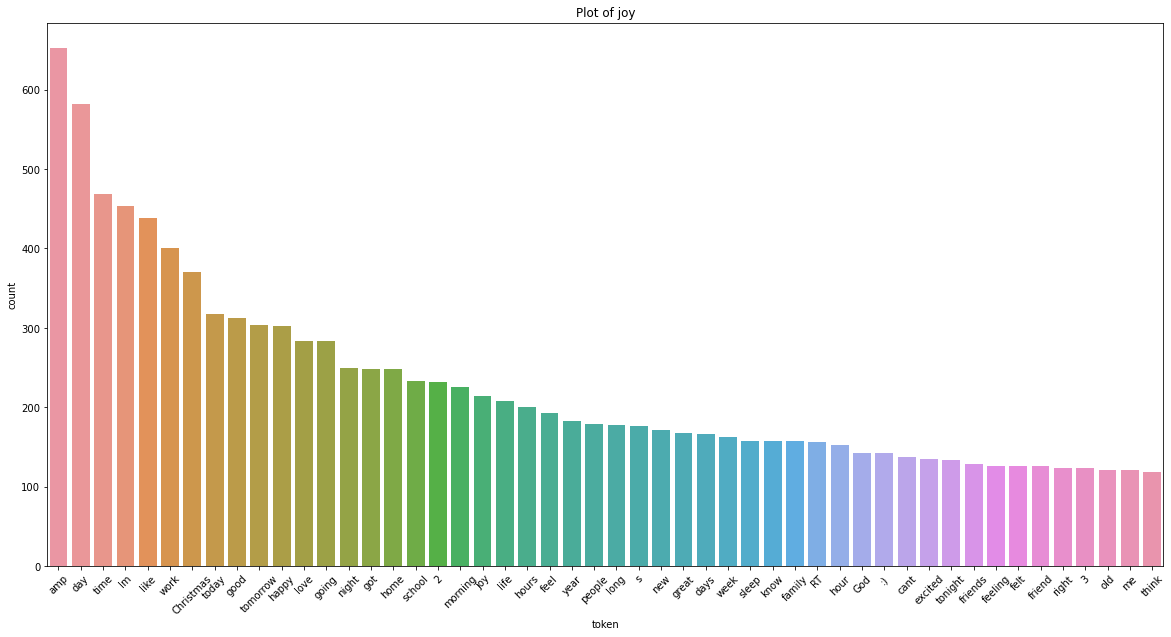

In [33]:
plot_most_common_words(Keyword_Joy,'joy')

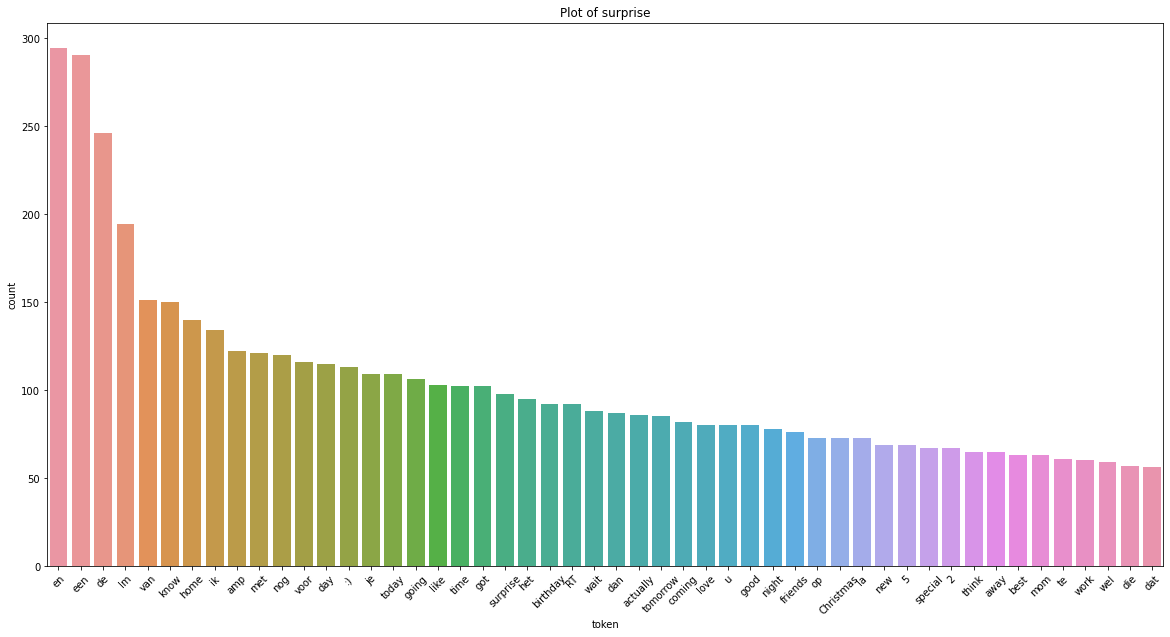

In [34]:
surprise_list=df[df['Emotion']=='surprise']['Cleaned Text'].tolist()
Surprise_docx=''.join(surprise_list)
Keyword_Surprise=extracted_keywords(Surprise_docx)
plot_most_common_words(Keyword_Surprise,'surprise')

### Word Cloud

In [35]:
from wordcloud import WordCloud

In [36]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

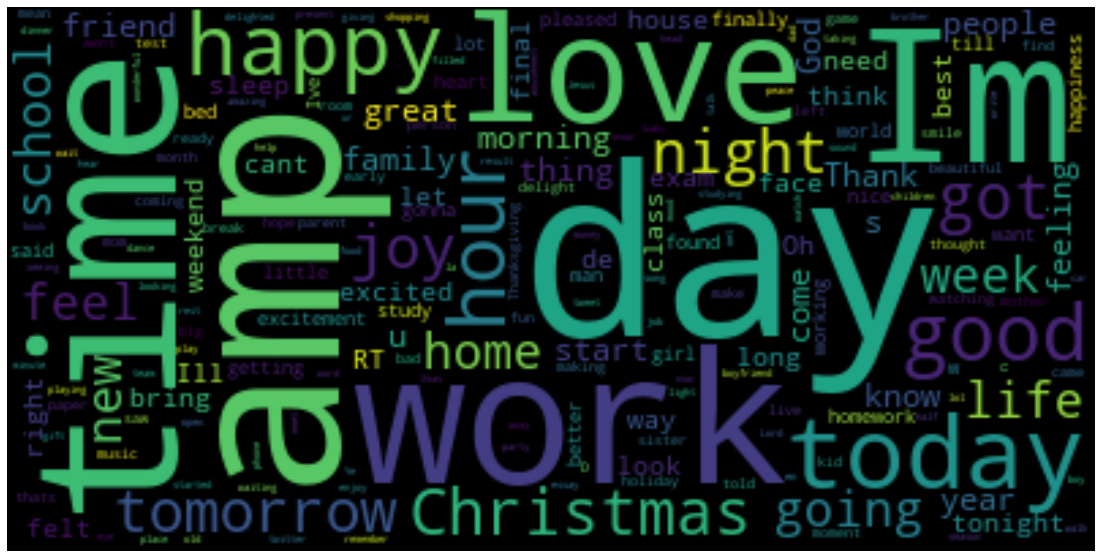

In [37]:
plot_wordcloud(Joy_docx)

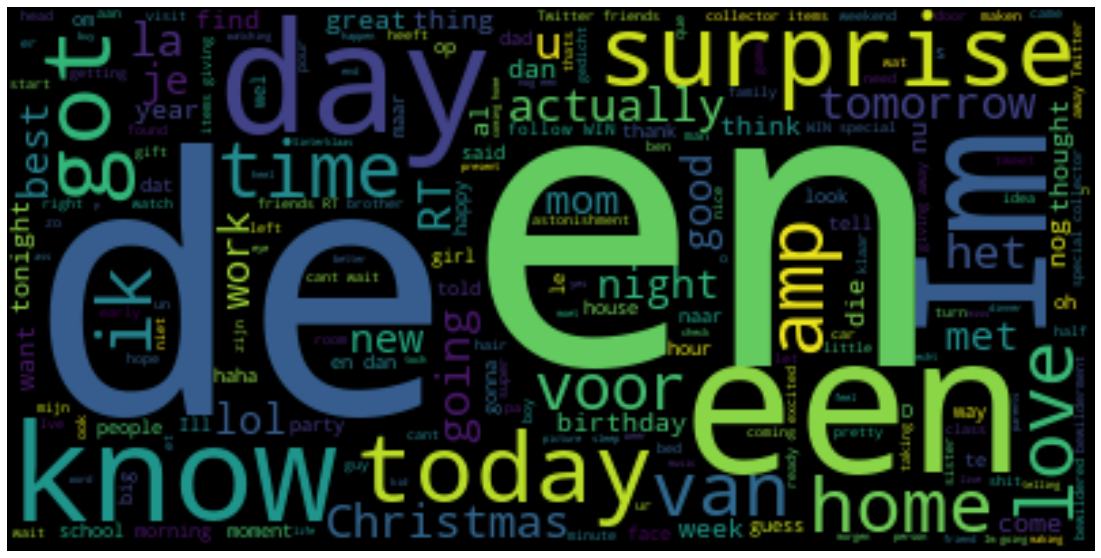

In [38]:
plot_wordcloud(Surprise_docx)

###machine learning

In [39]:
#ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
#metrics
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report ,plot_confusion_matrix
#split dataset
from sklearn.model_selection import train_test_split

build features from our text

In [40]:
xfeatures=df['Cleaned Text']
ylabels=df['Emotion']

In [41]:
xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Cleaned Text, Length: 34792, dtype: object

In [42]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(xfeatures)

In [43]:
#get features by name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [44]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

Build Our Model

In [46]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [47]:
nv_model.score(x_test,y_test)

0.5642843456600881

In [48]:
y_pred_for_nv=nv_model.predict(x_test)

Make A single Prediction

In [49]:
sample_text_1=['I love coding very much']
sample_text_2=['The baby girl is crying']

In [50]:
vect_1=cv.transform(sample_text_1).toarray()
vect_2=cv.transform(sample_text_2).toarray()

In [51]:
nv_model.predict(vect_1)

array(['joy'], dtype='<U8')

In [52]:
nv_model.predict_proba(vect_1)

array([[5.85773944e-03, 8.20314095e-04, 7.75650513e-02, 7.92278230e-01,
        7.25667895e-04, 1.01381692e-01, 6.19963774e-06, 2.13651054e-02]])

In [53]:
np.max(nv_model.predict_proba(vect_1))

0.7922782300161844

In [54]:
nv_model.predict(vect_2)

array(['joy'], dtype='<U8')

In [55]:
nv_model.predict_proba(vect_2)

array([[7.57711257e-03, 2.88413353e-04, 1.73875695e-02, 7.21871070e-01,
        7.65320073e-06, 2.35717235e-01, 2.32534867e-07, 1.71507137e-02]])

In [56]:
np.max(nv_model.predict_proba(vect_2))

0.7218710700453556

In [57]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    prediction_probability=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_, prediction_probability[0]))
    print('prediction:{},prediction_score:{}'.format(prediction[0],np.max(prediction_probability)))
    return pred_percentage_for_all

In [58]:
predict_emotion(sample_text_1,nv_model)

prediction:joy,prediction_score:0.7922782300161844


{'anger': 0.005857739444207437,
 'disgust': 0.0008203140954664981,
 'fear': 0.07756505127310882,
 'joy': 0.7922782300161844,
 'neutral': 0.0007256678954228754,
 'sadness': 0.10138169220397951,
 'shame': 6.199637737314864e-06,
 'surprise': 0.02136510543389237}

In [59]:
predict_emotion(['He hates running all the day'],nv_model)

prediction:joy,prediction_score:0.9444999558341814


{'anger': 0.011918789602691356,
 'disgust': 0.00015777712856120048,
 'fear': 0.005779377430013574,
 'joy': 0.9444999558341814,
 'neutral': 1.4730909188672618e-05,
 'sadness': 0.02662788269507922,
 'shame': 1.1910284596782694e-07,
 'surprise': 0.01100136729743731}

In [60]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [61]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

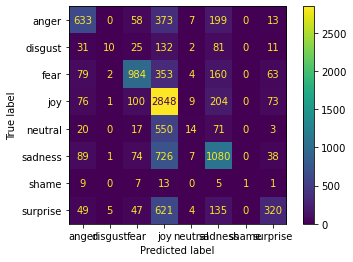

In [62]:
plot_confusion_matrix(nv_model,x_test,y_test)

In [63]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
y_pred_for_lr=lr_model.predict(x_test)

In [65]:
predict_emotion(sample_text_1,lr_model)

prediction:joy,prediction_score:0.7710712202524775


{'anger': 0.019690296543641107,
 'disgust': 0.009012830169189577,
 'fear': 0.021594703945800854,
 'joy': 0.7710712202524775,
 'neutral': 0.026612332649581315,
 'sadness': 0.07642293309345308,
 'shame': 0.0007480987594680514,
 'surprise': 0.07484758458638857}

In [66]:
predict_emotion(['He hates running all the day'],lr_model)

prediction:sadness,prediction_score:0.2790752826004147


{'anger': 0.16246247614714315,
 'disgust': 0.11147239473384545,
 'fear': 0.05226306991811714,
 'joy': 0.12844935871946694,
 'neutral': 0.029174019399310223,
 'sadness': 0.2790752826004147,
 'shame': 0.002019758460094464,
 'surprise': 0.235083640021608}

In [67]:
predict_emotion(sample_text_2,lr_model)

prediction:sadness,prediction_score:0.5639119027973268


{'anger': 0.05072426324781717,
 'disgust': 0.05525899768338339,
 'fear': 0.04644738413363556,
 'joy': 0.1914208374094197,
 'neutral': 0.010610341601512379,
 'sadness': 0.5639119027973268,
 'shame': 0.0019661589259360296,
 'surprise': 0.07966011420096894}

Apply Decision Tree

In [68]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_for_dtc=dtc.predict(x_test)

Apply Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, criterion = 'entropy',random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [72]:
y_pred_for_rfc=rfc.predict(x_test)

Apply Adaboost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [74]:
y_pred_for_abc=abc.predict(x_test)

Apply XGB Classifier

In [75]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred_for_xgb=xgb.predict(x_test)

Apply KNeighbours Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred_for_knc=knc.predict(x_test)

Apply Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [80]:
y_pred_for_gbc=gbc.predict(x_test)

In [81]:
models=[nv_model,lr_model,dtc,rfc,abc,xgb,gbc,knc]

In [82]:
def prediction_accuracy(model):
    score=model.score(x_test,y_test)
    y_pred_for_model=model.predict(x_test)
    print('*'*20)
    print('Model:{},Score:{}'.format(model,score))
    print(classification_report(y_test,y_pred_for_model))
    print(confusion_matrix(y_test,y_pred_for_model))
    print('*'*20)

In [83]:
for i in models:
    prediction_accuracy(i)

********************
Model:MultinomialNB(),Score:0.5642843456600881
              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438

[[ 633    0   58  373    7  199    0   13]
 [  31   10   25  132    2   81    0   11]
 [  79    2  984  353    4  160    0   63]
 [  76    1  100 2848    9  204    0   73]
 [  20    0   17  550   14   71    0    3]
 [  89    1   74  726    7 1080    0   38]
 [   9    0    7   13  

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00      1283
     disgust       0.00      0.00      0.00       292
        fear       0.85      0.10      0.19      1645
         joy       0.32      1.00      0.49      3311
     neutral       0.00      0.00      0.00       675
     sadness       0.00      0.00      0.00      2015
       shame       1.00      0.08      0.15        36
    surprise       0.00      0.00      0.00      1181

    accuracy                           0.33     10438
   macro avg       0.27      0.15      0.10     10438
weighted avg       0.24      0.33      0.18     10438

[[   0    0    2 1280    0    1    0    0]
 [   0    0    0  291    0    1    0    0]
 [   0    0  171 1474    0    0    0    0]
 [   0    0    3 3308    0    0    0    0]
 [   0    0    1  674    0    0    0    0]
 [   0    0   14 2001    0    0    0    0]
 [   0    0    9   19    0    5    3    0]
 [   0    0    0 1180    0    1    0    0]]
****

C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHUCHISMITA MALLICK\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [84]:
def PredEmotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    prediction_probability=model.predict_proba(myvect)
    max_proba=np.max(prediction_probability)
    pred=prediction[0]
    l=[pred,max_proba]
    return l

In [91]:
a=PredEmotion(['I love coding very much'],lr_model)
a

['joy', 0.7710712202524775]

In [85]:
Emotion1=[]
Emotion2=[]
Emotion3=[]
for i in models:
    a=PredEmotion(['I love coding very much'],i)
    Emotion1.append(a)
    b=PredEmotion(['You are so irritating'],i)
    Emotion2.append(b)
    c=PredEmotion(['He hates running all the day'],i)
    Emotion3.append(c)

In [86]:
def Extract_1(lst):
    return [item[0] for item in lst]
def Extract_2(lst):
    return [item[1] for item in lst]

In [87]:
df={'CLASSIFIER':['NAIVE BAYES','LOGISTIC REGRESSION','DECISION TREE',
                  'RANDOM FOREST','ADABOOST CLASSIFIER',
                  'XGB CLASSIFIER','GRADIENTBOOST CLASSIFIER','KNEIGHBORS CLASSIFIER'],
    

    'Emotion(I love coding very much)':Extract_1( Emotion1),
    'Prediction Score(I love coding very much)':Extract_2( Emotion1),
    'Emotion(You are so irritating)':Extract_1( Emotion2),
    'Prediction Score(You are so irritating)':Extract_2( Emotion2),
    'Emotion(He hates running all the day)':Extract_1( Emotion3),
   'Prediction Score(He hates running all the day)':Extract_2( Emotion3)}
table=pd.DataFrame(df)
table

,CLASSIFIER,Emotion(I love coding very much),Prediction Score(I love coding very much),Emotion(You are so irritating),Prediction Score(You are so irritating),Emotion(He hates running all the day),Prediction Score(He hates running all the day)
0,NAIVE BAYES,joy,0.792278,joy,0.538581,joy,0.944500
1,LOGISTIC REGRESSION,joy,0.771071,sadness,0.302709,sadness,0.279075
2,DECISION TREE,neutral,0.500000,surprise,1.000000,joy,1.000000
3,RANDOM FOREST,neutral,0.447222,surprise,0.400000,joy,0.566667
4,ADABOOST CLASSIFIER,joy,0.145825,joy,0.145825,joy,0.145825
5,XGB CLASSIFIER,fear,0.998310,fear,0.998310,fear,0.998310
6,GRADIENTBOOST CLASSIFIER,joy,0.384112,joy,0.319450,joy,0.424839
7,KNEIGHBORS CLASSIFIER,neutral,0.600000,neutral,1.000000,neutral,0.800000


In [88]:
import joblib

In [89]:
joblib.dump(lr_model, 'Logistic.pkl')
joblib.dump(dtc, 'DecisionTree.pkl')
joblib.dump(rfc, 'RandomForest.pkl')
joblib.dump(abc, 'AdaBoostClassifier.pkl')
joblib.dump(xgb, 'XGBClassifier.pkl')
joblib.dump(knc, 'KNeighbors.pkl')
joblib.dump(nv_model, 'naive_bayes.pkl')
joblib.dump(gbc, 'Gradientboost.pkl')

['Gradientboost.pkl']

In [93]:
a=PredEmotion(['I love you'],lr_model)
a

['joy', 0.3762708515602307]

In [94]:
joblib.dump(cv, 'vectorizer.pkl')

['vectorizer.pkl']